# Importing Required libraries and selecting style

In [1]:
import os
from google.cloud import bigquery
import db_dtypes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# selecting the style
# plt.style.use('fivethirtyeight')

## Setting up the framework(connecting with bigquery)

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'growschoolworkshop-0acce21849c9.json'

client = bigquery.Client()

### Query for Total top Batting Stats

In [3]:
total_batting_stats = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
),first_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_first_innings,
        SUM(batsman_run) AS first_innings_runs_scored,
        Count(batter) AS first_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 1 AND extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
),secound_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_secound_innings,
        SUM(batsman_run) AS secound_innings_runs_scored,
        Count(batter) AS secound_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 2 and extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
)
, BattingStats AS (
SELECT batter, 
    COUNT(DISTINCT(ID)) AS total_innings,
    SUM(batsman_run) AS total_runs_scored,
    Count(batter) AS total_balls_faced
FROM mumbaiBatting
WHERE extras_run=0
GROUP BY 1
ORDER BY 2 DESC
), detailed_batting_stats AS(
  SELECT bs.batter,total_innings,total_runs_scored,total_balls_faced,
        ROUND((total_runs_scored/total_innings), 2) AS total_batting_avg,
        ROUND((total_runs_scored/total_balls_faced)*100, 2) AS total_strikerate,
        no_first_innings,first_innings_runs_scored,first_innings_balls_faced,
        ROUND((first_innings_runs_scored/no_first_innings), 2) AS first_batting_avg,
        ROUND((first_innings_runs_scored/first_innings_balls_faced)*100, 2) AS first_strikerate,
        no_secound_innings,secound_innings_runs_scored,secound_innings_balls_faced,
        ROUND((secound_innings_runs_scored/no_secound_innings), 2) AS secound_batting_avg,
        ROUND((secound_innings_runs_scored/secound_innings_balls_faced)*100, 2) AS secound_strikerate
  FROM BattingStats bs
  JOIN secound_innings_stats ss ON bs.batter=ss.batter
  JOIN first_innings_stats fs ON bs.batter=fs.batter
  WHERE total_balls_faced > 50
), total_batting_stats AS(
  SELECT batter,
      total_innings,
      total_runs_scored,
      total_batting_avg, 
      total_strikerate
  FROM detailed_batting_stats
), first_batting_stats AS(
  SELECT batter,
      no_first_innings,
      first_innings_runs_scored,
      first_batting_avg, 
      first_strikerate
  FROM detailed_batting_stats
), secound_batting_stats AS(
  SELECT batter,
      no_secound_innings,
      secound_innings_runs_scored,
      secound_batting_avg, 
      secound_strikerate
  FROM detailed_batting_stats
)
SELECT * FROM total_batting_stats ORDER BY batter
"""

total_batting_stats_df = client.query(total_batting_stats).to_dataframe()
total_batting_stats_df

,batter,total_innings,total_runs_scored,total_batting_avg,total_strikerate
0,D Brevis,7,161,23.00,142.48
1,Ishan Kishan,14,414,29.57,120.70
2,KA Pollard,11,144,13.09,112.50
3,RG Sharma,14,264,18.86,121.10
4,SA Yadav,8,301,37.63,149.75
5,TH David,8,186,23.25,216.28
6,Tilak Varma,14,397,28.36,134.12


### Query for First innings top Batting Stats

In [4]:
batter_name = total_batting_stats_df['batter']
total_runs = total_batting_stats_df['total_runs_scored']
total_avarage = total_batting_stats_df['total_batting_avg']
total_strikerate = total_batting_stats_df['total_strikerate']
width = 0.25

In [5]:
first_batting_stats = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
),first_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_first_innings,
        SUM(batsman_run) AS first_innings_runs_scored,
        Count(batter) AS first_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 1 AND extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
),secound_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_secound_innings,
        SUM(batsman_run) AS secound_innings_runs_scored,
        Count(batter) AS secound_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 2 and extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
)
, BattingStats AS (
SELECT batter, 
    COUNT(DISTINCT(ID)) AS total_innings,
    SUM(batsman_run) AS total_runs_scored,
    Count(batter) AS total_balls_faced
FROM mumbaiBatting
WHERE extras_run=0
GROUP BY 1
ORDER BY 2 DESC
), detailed_batting_stats AS(
  SELECT bs.batter,total_innings,total_runs_scored,total_balls_faced,
        ROUND((total_runs_scored/total_innings), 2) AS total_batting_avg,
        ROUND((total_runs_scored/total_balls_faced)*100, 2) AS total_strikerate,
        no_first_innings,first_innings_runs_scored,first_innings_balls_faced,
        ROUND((first_innings_runs_scored/no_first_innings), 2) AS first_batting_avg,
        ROUND((first_innings_runs_scored/first_innings_balls_faced)*100, 2) AS first_strikerate,
        no_secound_innings,secound_innings_runs_scored,secound_innings_balls_faced,
        ROUND((secound_innings_runs_scored/no_secound_innings), 2) AS secound_batting_avg,
        ROUND((secound_innings_runs_scored/secound_innings_balls_faced)*100, 2) AS secound_strikerate
  FROM BattingStats bs
  JOIN secound_innings_stats ss ON bs.batter=ss.batter
  JOIN first_innings_stats fs ON bs.batter=fs.batter
  WHERE total_balls_faced > 50
), first_batting_stats AS(
  SELECT batter,
      no_first_innings,
      first_innings_runs_scored,
      first_batting_avg, 
      first_strikerate
  FROM detailed_batting_stats
)
SELECT * FROM first_batting_stats ORDER BY batter
"""

first_batting_stats_df = client.query(first_batting_stats).to_dataframe()
first_batting_stats_df

,batter,no_first_innings,first_innings_runs_scored,first_batting_avg,first_strikerate
0,D Brevis,3,41,13.67,110.81
1,Ishan Kishan,5,166,33.20,132.80
2,KA Pollard,5,43,8.60,126.47
3,RG Sharma,5,113,22.60,128.41
4,SA Yadav,4,163,40.75,159.80
5,TH David,2,56,28.00,193.10
6,Tilak Varma,5,132,26.40,130.69


In [6]:
first_innings_runs = first_batting_stats_df['first_innings_runs_scored']
first_innings_avarage = first_batting_stats_df['first_batting_avg']
first_innings_strikerate = first_batting_stats_df['first_strikerate']

### Query for Secound innings top Batting Stats

In [7]:
secound_batting_stats = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
),first_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_first_innings,
        SUM(batsman_run) AS first_innings_runs_scored,
        Count(batter) AS first_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 1 AND extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
),secound_innings_stats AS(
  SELECT batter,
        COUNT(DISTINCT(ID)) AS no_secound_innings,
        SUM(batsman_run) AS secound_innings_runs_scored,
        Count(batter) AS secound_innings_balls_faced,
  FROM mumbaiBatting
  WHERE innings = 2 and extras_run=0
  GROUP BY 1
  ORDER BY 2 DESC  
)
, BattingStats AS (
SELECT batter, 
    COUNT(DISTINCT(ID)) AS total_innings,
    SUM(batsman_run) AS total_runs_scored,
    Count(batter) AS total_balls_faced
FROM mumbaiBatting
WHERE extras_run=0
GROUP BY 1
ORDER BY 2 DESC
), detailed_batting_stats AS(
  SELECT bs.batter,total_innings,total_runs_scored,total_balls_faced,
        ROUND((total_runs_scored/total_innings), 2) AS total_batting_avg,
        ROUND((total_runs_scored/total_balls_faced)*100, 2) AS total_strikerate,
        no_first_innings,first_innings_runs_scored,first_innings_balls_faced,
        ROUND((first_innings_runs_scored/no_first_innings), 2) AS first_batting_avg,
        ROUND((first_innings_runs_scored/first_innings_balls_faced)*100, 2) AS first_strikerate,
        no_secound_innings,secound_innings_runs_scored,secound_innings_balls_faced,
        ROUND((secound_innings_runs_scored/no_secound_innings), 2) AS secound_batting_avg,
        ROUND((secound_innings_runs_scored/secound_innings_balls_faced)*100, 2) AS secound_strikerate
  FROM BattingStats bs
  JOIN secound_innings_stats ss ON bs.batter=ss.batter
  JOIN first_innings_stats fs ON bs.batter=fs.batter
  WHERE total_balls_faced > 50
), secound_batting_stats AS(
  SELECT batter,
      no_secound_innings,
      secound_innings_runs_scored,
      secound_batting_avg, 
      secound_strikerate
  FROM detailed_batting_stats
)
SELECT * FROM secound_batting_stats ORDER BY batter
"""

secound_batting_stats_df = client.query(secound_batting_stats).to_dataframe()
secound_batting_stats_df

,batter,no_secound_innings,secound_innings_runs_scored,secound_batting_avg,secound_strikerate
0,D Brevis,4,120,30.00,157.89
1,Ishan Kishan,9,248,27.56,113.76
2,KA Pollard,6,101,16.83,107.45
3,RG Sharma,9,151,16.78,116.15
4,SA Yadav,4,138,34.50,139.39
5,TH David,6,130,21.67,228.07
6,Tilak Varma,9,265,29.44,135.90


In [8]:
secound_innings_runs = secound_batting_stats_df['secound_innings_runs_scored']
secound_innings_avarage = secound_batting_stats_df['secound_batting_avg']
secound_innings_strikerate = secound_batting_stats_df['secound_strikerate']
x_indexes = np.arange(len(batter_name))

### Plots for Runs, Batting Avarage, Strike Rate

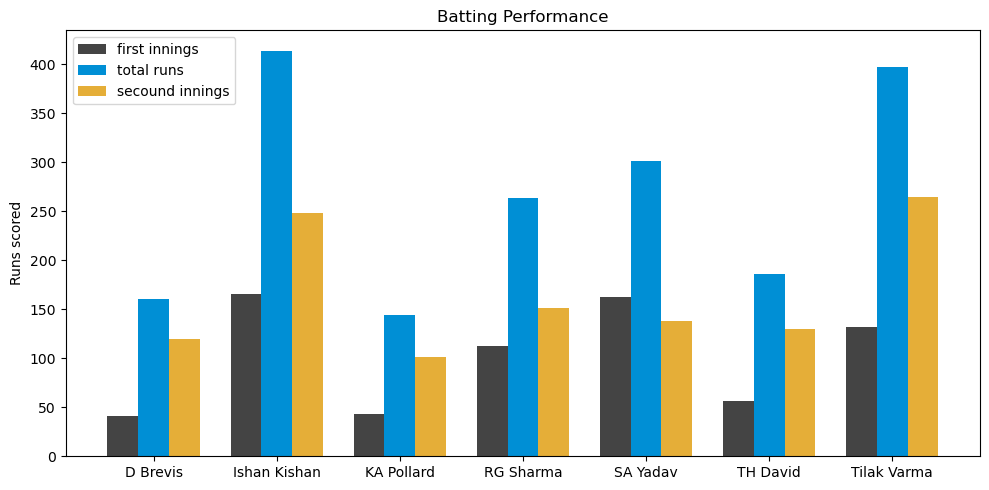

In [9]:
plt.figure(figsize=(10,5))
plt.bar(x_indexes - width, first_innings_runs, width=width, color='#444444', label='first innings')
plt.bar(x_indexes, total_runs, width=width, color='#008fd5', label='total runs')
plt.bar(x_indexes + width, secound_innings_runs, width=width, color='#e5ae38', label='secound innings')
# plt.plot(name, strikerate, color='#444444', linestyle='--', label='Strike Rate')
# plt.plot(name, strikerate, color='#444444', linestyle='--', label='Strike Rate')
plt.legend()

plt.xticks(ticks=x_indexes, labels=batter_name)

plt.title('Batting Performance')
plt.ylabel('Runs scored')
plt.legend()
plt.tight_layout()
plt.show()

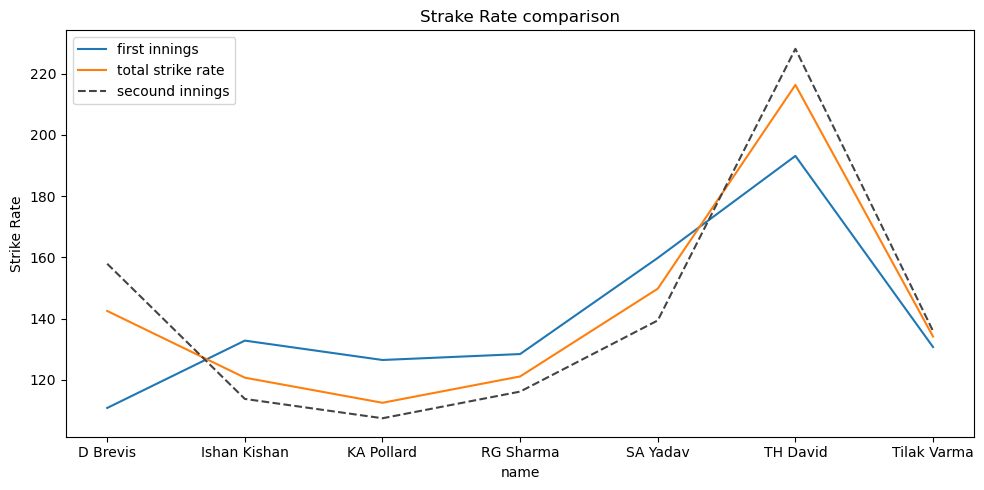

In [10]:
plt.figure(figsize=(10,5))
plt.plot(batter_name, first_innings_strikerate, label='first innings')
plt.plot(batter_name, total_strikerate, label='total strike rate')
plt.plot(batter_name, secound_innings_strikerate, color='#444444', linestyle='--', label='secound innings')
plt.xlabel('name')
plt.ylabel('Strike Rate')
plt.title('Strake Rate comparison')
plt.legend()
plt.tight_layout()
plt.show()

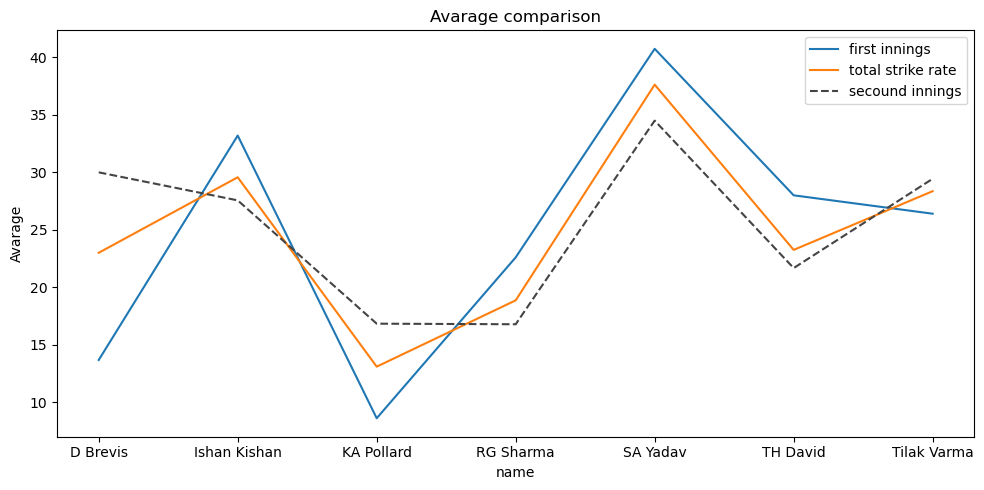

In [11]:
plt.figure(figsize=(10,5))
plt.plot(batter_name, first_innings_avarage, label='first innings')
plt.plot(batter_name, total_avarage, label='total strike rate')
plt.plot(batter_name, secound_innings_avarage, color='#444444', linestyle='--', label='secound innings')
plt.xlabel('name')
plt.ylabel('Avarage')
plt.title('Avarage comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
moving_strike_rate = """
With mumbaiBatting AS(
  SELECT b.*
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` b
  WHERE BattingTeam='Mumbai Indians' AND extras_run=0
  ORDER BY batter
),distinct_batter AS(
  SELECT DISTINCT(batter)
  FROM mumbaiBatting
  GROUP BY 1
),batter_ids AS(
  SELECT batter,
    ROW_NUMBER() OVER(ORDER BY batter) As batter_id
  From distinct_batter
), for_strike_rake AS(
  SELECT ID,
      mb.batter,
      bi.batter_id,
      overs,
      ballnumber,
      batsman_run,
      COUNT(mb.batter) OVER(PARTITION BY mb.batter) AS totaL_balls_faced
  FROM mumbaiBatting mb 
  JOIN batter_ids bi ON mb.batter=bi.batter
), moving_strike_rate AS(
SELECT ID, batter,
      overs,
      ballnumber,
      batsman_run,
      ROUND((SUM(batsman_run) OVER(PARTITION BY batter)/totaL_balls_faced)* 100, 2) AS total_strike_rate,
      LAG(batsman_run, 1) OVER (PARTITION BY batter_id ORDER BY ID, overs, ballnumber) AS one_prev_run,
      LAG(batsman_run, 2) OVER (PARTITION BY batter_id ORDER BY ID, overs, ballnumber) AS two_prev_run,
      LAG(batsman_run, 3) OVER (PARTITION BY batter_id ORDER BY ID, overs, ballnumber) AS three_prev_run,
      LAG(batsman_run, 4) OVER (PARTITION BY batter_id ORDER BY ID, overs, ballnumber) AS four_prev_run
FROM for_strike_rake
WHERE totaL_balls_faced > 50
)
SELECT batter, total_strike_rate,
       ROUND(((batsman_run+one_prev_run+two_prev_run)*100)/3, 2) AS msr_three_balls,
       ROUND(((batsman_run+one_prev_run+two_prev_run+three_prev_run+four_prev_run)*100)/5, 2) AS msr_five_balls
FROM moving_strike_rate
"""

moving_strike_rate_df = client.query(moving_strike_rate).to_dataframe()

### Extracting moving strikerate of spacific player using pandas

In [13]:
tilak_varma_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'Tilak Varma'].reset_index(drop=True)
d_brevis_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'D Brevis'].reset_index(drop=True)
ishan_kishan_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'Ishan Kishan'].reset_index(drop=True)
ka_pollard_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'KA Pollard'].reset_index(drop=True)
rg_sharma_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'RG Sharma'].reset_index(drop=True)
sa_yadav_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'SA Yadav'].reset_index(drop=True)
th_david_df = moving_strike_rate_df[moving_strike_rate_df['batter'] == 'TH David'].reset_index(drop=True)

### Adding different varibles for moving strikerate and strikerate of different players

In [14]:
tilak_strike_rate = tilak_varma_df['total_strike_rate']
brevis_strike_rate = d_brevis_df['total_strike_rate']
ishan_kishan_strike_rate = ishan_kishan_df['total_strike_rate']
ka_pollard_strike_rate = ka_pollard_df['total_strike_rate']
rg_sharma_strike_rate = rg_sharma_df['total_strike_rate']
sa_yadav_strike_rate = sa_yadav_df['total_strike_rate']
th_david_strike_rate = th_david_df['total_strike_rate']

tilak_msr_three_balls = tilak_varma_df['msr_three_balls']
brevis_msr_three_balls = d_brevis_df['msr_three_balls']
ishan_kishan_three_balls = ishan_kishan_df['msr_three_balls']
ka_pollard_three_balls = ka_pollard_df['msr_three_balls']
rg_sharma_three_balls = rg_sharma_df['msr_three_balls']
sa_yadav_three_balls = sa_yadav_df['msr_three_balls']
th_david_three_balls = th_david_df['msr_three_balls']

tilak_msr_five_balls = tilak_varma_df['msr_five_balls']
brevis_msr_five_balls = d_brevis_df['msr_five_balls']
ishan_kishan_five_balls = ishan_kishan_df['msr_five_balls']
ka_pollard_five_balls = ka_pollard_df['msr_five_balls']
rg_sharma_five_balls = rg_sharma_df['msr_five_balls']
sa_yadav_five_balls = sa_yadav_df['msr_five_balls']
th_david_five_balls = th_david_df['msr_five_balls']

### We need to calculate the most balls played by the list of player

In [15]:
dataframe_names = ['tilak_varma_df', 'd_brevis_df', 'ishan_kishan_df', 'ka_pollard_df', 'rg_sharma_df', 'sa_yadav_df', 'th_david_df']

ball_number = 0

for name in dataframe_names:
    dataframe = globals()[name]
    length = len(dataframe)
    if length > ball_number:
        ball_number = length

balls = np.arange(1, ball_number+1)

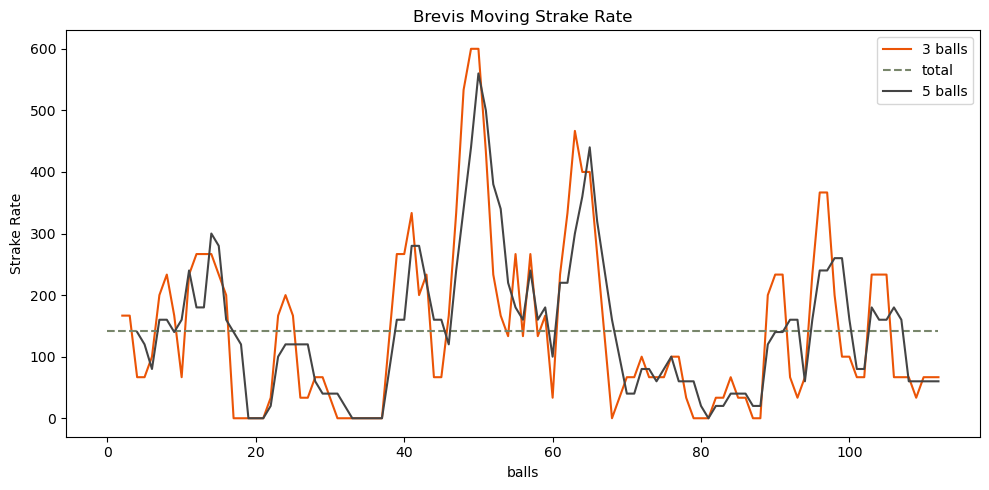

In [16]:
plt.figure(figsize=(10,5))
plt.plot(brevis_msr_three_balls, color='#EB5406',label='3 balls')
plt.plot(brevis_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(brevis_msr_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Brevis Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

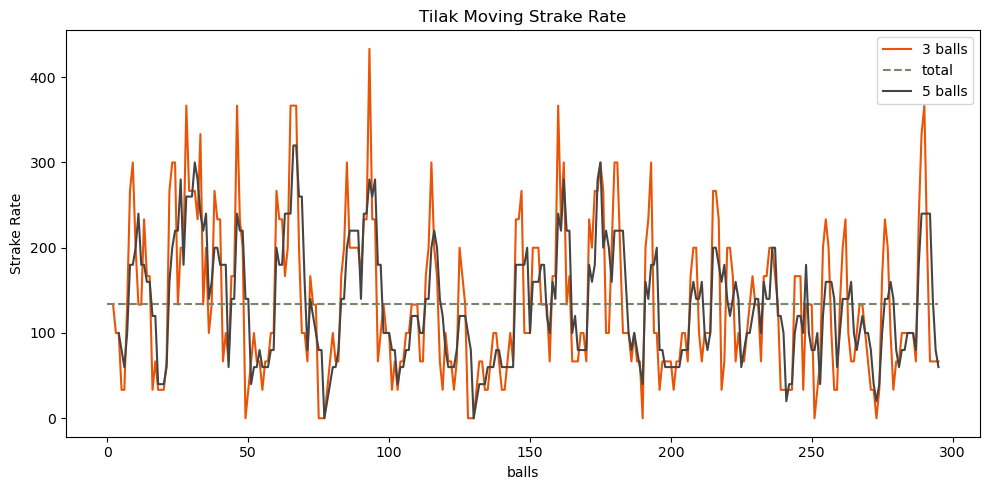

In [17]:
plt.figure(figsize=(10,5))
plt.plot(tilak_msr_three_balls, color='#EB5406', label='3 balls')
plt.plot(tilak_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(tilak_msr_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Tilak Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

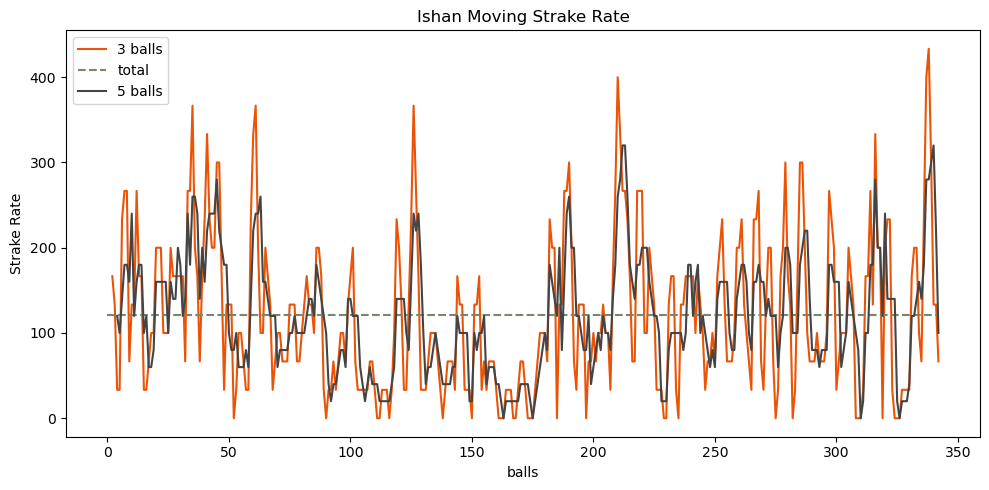

In [18]:
plt.figure(figsize=(10,5))
plt.plot(ishan_kishan_three_balls, color='#EB5406', label='3 balls')
plt.plot(ishan_kishan_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(ishan_kishan_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Ishan Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

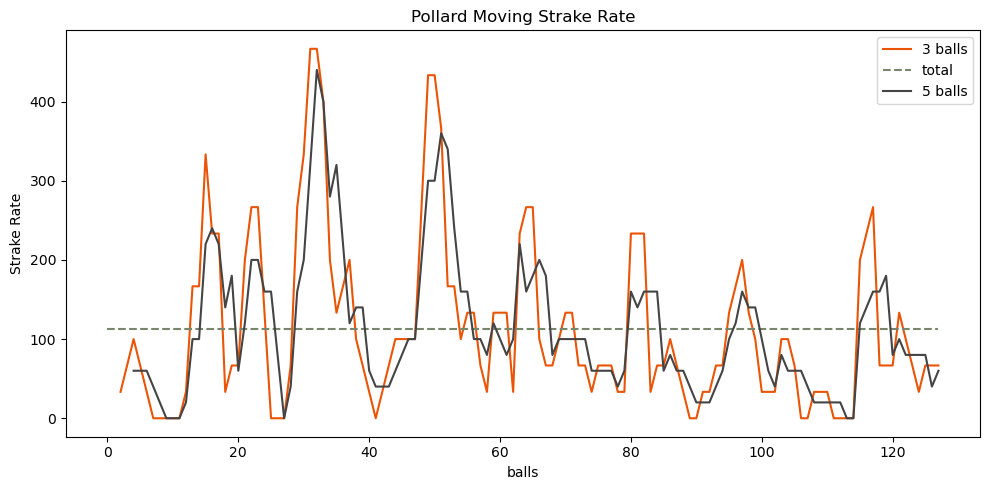

In [19]:
plt.figure(figsize=(10,5))
plt.plot(ka_pollard_three_balls, color='#EB5406',label='3 balls')
plt.plot(ka_pollard_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(ka_pollard_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Pollard Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

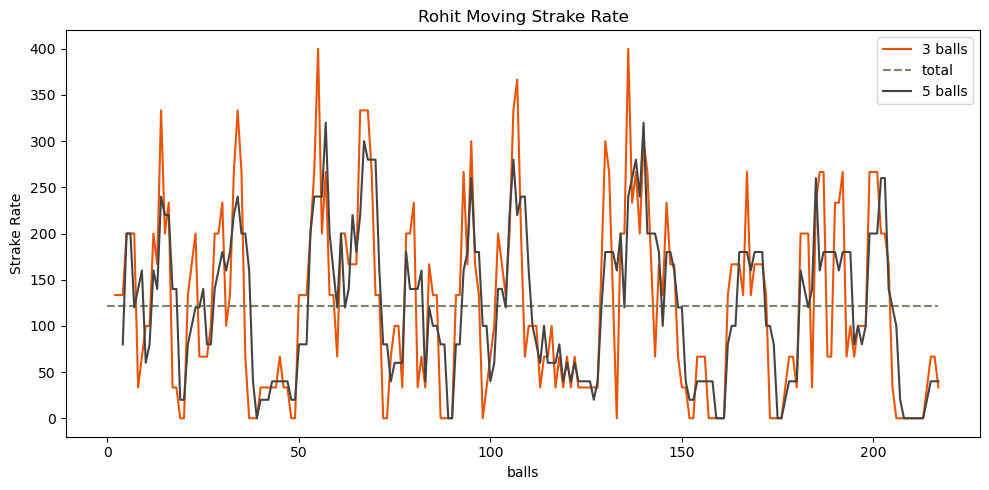

In [20]:
plt.figure(figsize=(10,5))
plt.plot(rg_sharma_three_balls, color='#EB5406',label='3 balls')
plt.plot(rg_sharma_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(rg_sharma_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Rohit Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

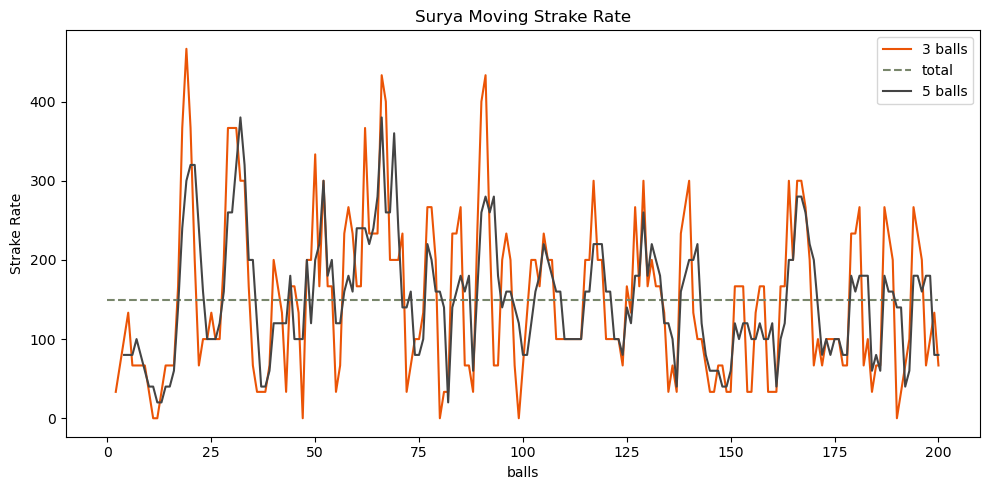

In [21]:
plt.figure(figsize=(10,5))
plt.plot(sa_yadav_three_balls, color='#EB5406',label='3 balls')
plt.plot(sa_yadav_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(sa_yadav_five_balls, color='#444444', label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Surya Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

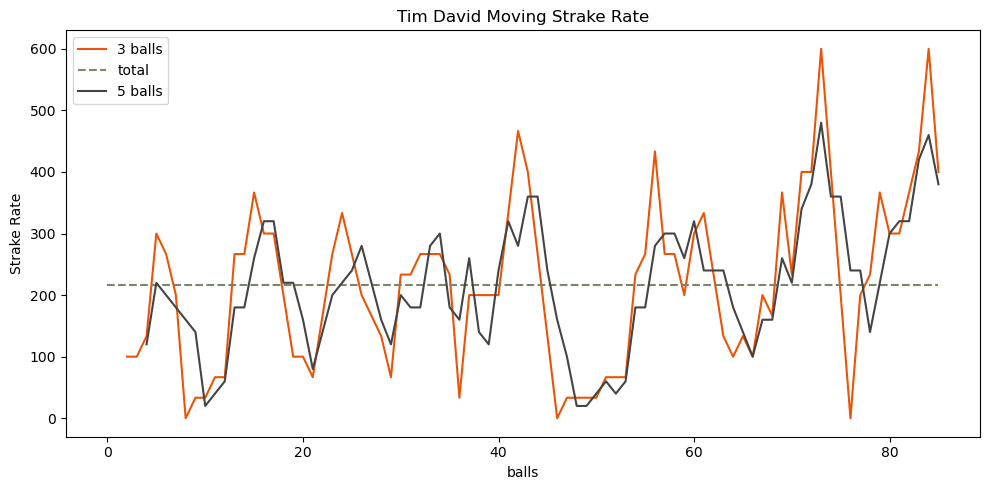

In [22]:
plt.figure(figsize=(10,5))
plt.plot(th_david_three_balls, color='#EB5406',label='3 balls')
plt.plot(th_david_strike_rate, color='#78866B', linestyle='--',label='total')
plt.plot(th_david_five_balls, color='#444444',  label='5 balls')
plt.xlabel('balls')
plt.ylabel('Strake Rate')
plt.title('Tim David Moving Strake Rate')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
power_play_batting = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
), first_six_overs AS(
  SELECT ID, 
        innings,
        overs,
        ballnumber,
        batter,
        batsman_run,
        extras_run 
  FROM mumbaiBatting
  WHERE overs<=5
  ORDER BY ID, overs, ballnumber
), runs_by_player_in_power_play AS(
SELECT batter,
          IF((SELECT SUM(batsman_run) FROM first_six_overs WHERE batter = fs.batter) > 10, batter, 'Others') AS batter_name,
          (SELECT SUM(batsman_run) FROM first_six_overs) AS total_runs,
          (SELECT SUM(batsman_run) FROM first_six_overs WHERE innings = 1) AS first_total_runs,
          (SELECT SUM(batsman_run) FROM first_six_overs WHERE innings = 2) AS secound_total_runs,
          (SELECT SUM(batsman_run) FROM first_six_overs WHERE batter = fs.batter) AS total_runs_by_player,
          (SELECT SUM(batsman_run) FROM first_six_overs WHERE batter = fs.batter AND innings=1) AS first_innings_runs,
          (SELECT SUM(batsman_run) FROM first_six_overs WHERE batter = fs.batter AND innings=2) AS secound_innings_runs,
  FROM first_six_overs fs
  GROUP BY 1
  ORDER BY 2 DESC
), power_play_analysis AS(
  SELECT batter_name,
          total_runs, 
          first_total_runs, 
          secound_total_runs, 
          SUM(total_runs_by_player) AS player_tr, 
          SUM(first_innings_runs) AS player_fir, 
          SUM(secound_innings_runs) AS player_sir
  FROM runs_by_player_in_power_play 
  GROUP BY 1, 2, 3, 4
)
SELECT * FROM power_play_analysis ORDER BY player_tr DESC
"""

power_play_batting_df = client.query(power_play_batting).to_dataframe()
player_total_runs = power_play_batting_df['player_tr']
player = power_play_batting_df['batter_name']

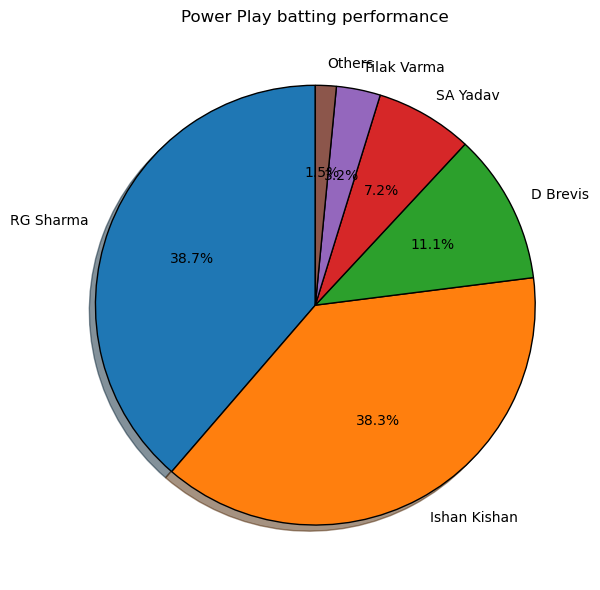

In [51]:
plt.figure(figsize=(8,6))
plt.pie(player_total_runs, labels=player, shadow=True,
        startangle=90, autopct='%1.1f%%',
       wedgeprops={'edgecolor': 'black'})
plt.title('Power Play batting performance')
plt.tight_layout()
plt.show()

In [57]:
middle_overs_batting = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
), middle_overs AS(
  SELECT batter,
          IF((SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND overs>=6 AND overs<=14) > 20, batter, 'Others') AS batter_name,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE overs>=6 AND overs<=14) AS total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE innings = 1 AND overs>=6 AND overs<=14) AS first_total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE innings = 2 AND overs>=6 AND overs<=14) AS secound_total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND overs>=6 AND overs<=14) AS total_runs_by_player,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND innings=1 AND overs>=6 AND overs<=14) AS first_innings_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND innings=2 AND overs>=6 AND overs<=14) AS secound_innings_runs,
  FROM mumbaiBatting fs
  WHERE overs>=6 AND overs<=14
  GROUP BY 1
  ORDER BY 2 DESC
), middle_over_analysis AS(
  SELECT batter_name,
          total_runs, 
          first_total_runs, 
          secound_total_runs, 
          SUM(total_runs_by_player) AS player_tr, 
          SUM(first_innings_runs) AS player_fir, 
          SUM(secound_innings_runs) AS player_sir
  FROM middle_overs
  GROUP BY 1, 2, 3, 4
)
SELECT * FROM middle_over_analysis ORDER BY player_tr DESC
"""

middle_overs_batting_df = client.query(middle_overs_batting).to_dataframe()
player_total_runs = middle_overs_batting_df['player_tr']
player = middle_overs_batting_df['batter_name']

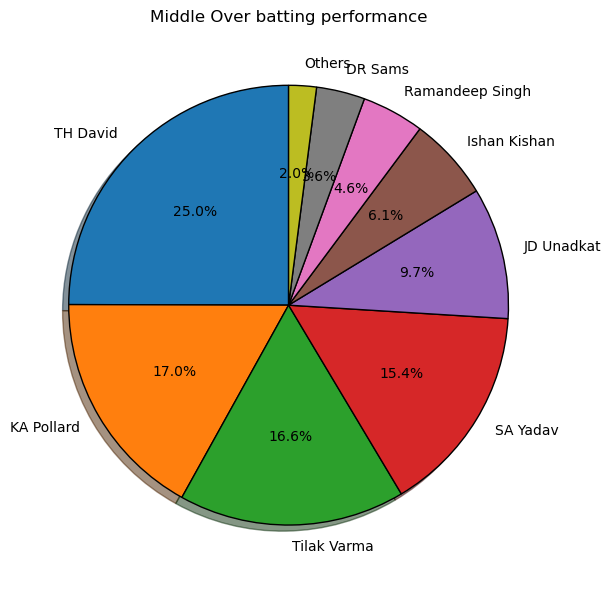

In [63]:
plt.figure(figsize=(8,6))
plt.pie(player_total_runs, labels=player, shadow=True,
        startangle=90, autopct='%1.1f%%',
       wedgeprops={'edgecolor': 'black'})
plt.title('Middle Over batting performance')
plt.tight_layout()
plt.show()

In [60]:
death_overs_batting = """
With mumbaiBatting AS(
  SELECT * 
  FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` 
  WHERE BattingTeam='Mumbai Indians'
), final_overs AS(
  SELECT batter,
          IF((SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND overs>14) > 20, batter, 'Others') AS batter_name,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE overs>14) AS total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE innings = 1 AND overs>14) AS first_total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE innings = 2 AND overs>14) AS secound_total_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND overs>14) AS total_runs_by_player,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND innings=1 AND overs>14) AS first_innings_runs,
          (SELECT SUM(batsman_run) FROM mumbaiBatting WHERE batter = fs.batter AND innings=2 AND overs>14) AS secound_innings_runs,
  FROM mumbaiBatting fs
  WHERE overs>=6 AND overs<=14
  GROUP BY 1
  ORDER BY 2 DESC
), final_over_analysis AS(
  SELECT batter_name,
          total_runs, 
          first_total_runs, 
          secound_total_runs, 
          SUM(total_runs_by_player) AS player_tr, 
          SUM(first_innings_runs) AS player_fir, 
          SUM(secound_innings_runs) AS player_sir
  FROM final_overs
  GROUP BY 1, 2, 3, 4
)
SELECT * FROM final_over_analysis ORDER BY player_tr DESC
"""

death_overs_batting_df = client.query(death_overs_batting).to_dataframe()
player_total_runs = death_overs_batting_df['player_tr']
player = death_overs_batting_df['batter_name']

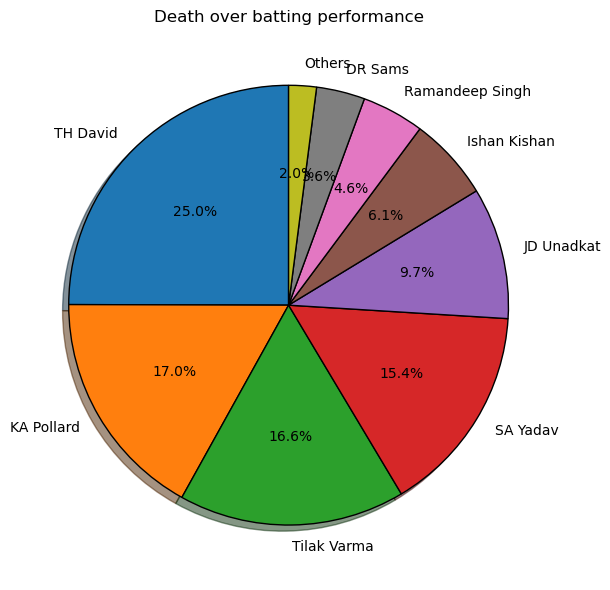

In [62]:
plt.figure(figsize=(8,6))
plt.pie(player_total_runs, labels=player, shadow=True,
        startangle=90, autopct='%1.1f%%',
       wedgeprops={'edgecolor': 'black'})
plt.title('Death over batting performance')
plt.tight_layout()
plt.show()

### Does dot balls effect the game 

In [96]:
total_dot_balls = """
SELECT overs, 
        COUNT(ballnumber) AS total_dot_balls,
FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022`
WHERE batsman_run = 0 AND extras_run = 0
      AND BattingTeam = 'Mumbai Indians'
GROUP BY overs
ORDER BY 1
"""

overs = np.arange(1, 21)
total_dot_balls_df = client.query(total_dot_balls).to_dataframe()
total_dot_balls = total_dot_balls_df['total_dot_balls']

In [97]:
winning_match_dot_balls="""
SELECT overs,
        COUNT(b.ballnumber) AS total_dot_balls,
FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` b JOIN 
      `growschoolworkshop.IPL_2022.Matches_2022` m ON b.ID=m.ID
WHERE b.batsman_run = 0 AND extras_run = 0 
AND m.WinningTeam='Mumbai Indians'
AND b.BattingTeam = 'Mumbai Indians'
GROUP BY overs
ORDER BY 1
"""

winning_match_dot_balls_df = client.query(winning_match_dot_balls).to_dataframe()
winning_match_dot_balls = winning_match_dot_balls_df['total_dot_balls']

In [98]:
losing_match_dot_balls="""
SELECT overs,
        COUNT(b.ballnumber) AS total_dot_balls,
FROM `growschoolworkshop.IPL_2022.ball_by_ball_2022` b JOIN 
      `growschoolworkshop.IPL_2022.Matches_2022` m ON b.ID=m.ID
WHERE b.batsman_run = 0 AND extras_run = 0 
AND m.WinningTeam<>'Mumbai Indians'
AND b.BattingTeam = 'Mumbai Indians'
GROUP BY overs
ORDER BY 1
"""

losing_match_dot_balls_df = client.query(losing_match_dot_balls).to_dataframe()
losing_match_dot_balls = losing_match_dot_balls_df['total_dot_balls']

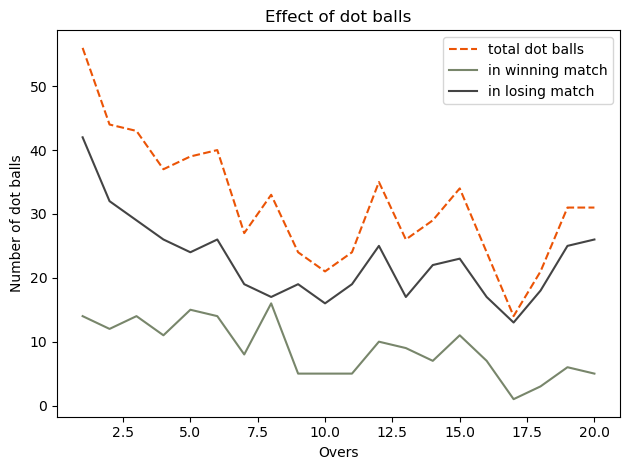

In [99]:
# plt.figure(figsize=(10,5))
plt.plot(overs, total_dot_balls, color='#EB5406', linestyle='--', label='total dot balls')
plt.plot(overs, winning_match_dot_balls, color='#78866B',label='in winning match')
plt.plot(overs, losing_match_dot_balls, color='#444444',  label='in losing match')
plt.xlabel('Overs')
plt.ylabel('Number of dot balls')
plt.title('Effect of dot balls')
plt.legend()
plt.tight_layout()
plt.show()